## Challenge Conclusions 
        - While intepreting the data, my conclusion is that the placebo is as effective as Ketapril and Infubinol. All three of these drugs had an insignificant effect on lowering tumor volume. The drug that seemed to have a significant effect on lowering tumor volume was Capomulin. Capomulin showed progress in lowering tumor volume and lowering the spread of metastatic sites. 

In [23]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
fig = plt
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
mouse_trial_data = pd.merge(trial_data, mouse_data, how = "left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


### Tumor Response to Treatment

In [24]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# Convert to DataFrame

tumor_volume_mean = mouse_trial_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
tumor_volume_mean_df = pd.DataFrame(tumor_volume_mean)
tumor_volume_mean_df = tumor_volume_mean_df.reset_index()
tumor_volume_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [25]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame

tumor_volume_error = mouse_trial_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
tumor_volume_error_df = pd.DataFrame(tumor_volume_error)
tumor_volume_error_df = tumor_volume_error_df.reset_index()
tumor_volume_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [26]:
# Minor Data Munging to Re-Format the Data Frames

tumor_volume_error_pivot = tumor_volume_error_df.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
tumor_volume_mean_df_pivot = tumor_volume_mean_df.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
tumor_volume_mean_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


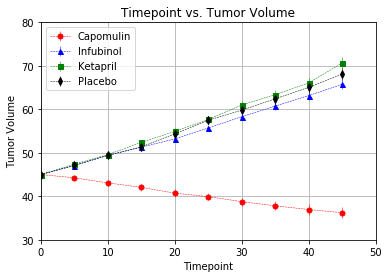

In [27]:
# Generate the Plot with Error Bars

Capomulin = plt.errorbar(tumor_volume_mean_df_pivot.index, tumor_volume_mean_df_pivot["Capomulin"], yerr = tumor_volume_error_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
Infubinol = plt.errorbar(tumor_volume_mean_df_pivot.index, tumor_volume_mean_df_pivot["Infubinol"], yerr = tumor_volume_error_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
Ketapril = plt.errorbar(tumor_volume_mean_df_pivot.index, tumor_volume_mean_df_pivot["Ketapril"], yerr = tumor_volume_error_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
Placebo = plt.errorbar(tumor_volume_mean_df_pivot.index, tumor_volume_mean_df_pivot["Placebo"], yerr = tumor_volume_error_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.legend(handles = [Capomulin, Infubinol, Ketapril, Placebo], labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc = "best")
plt.title("Timepoint vs. Tumor Volume")
plt.ylabel("Tumor Volume")
plt.xlabel("Timepoint")
plt.ylim(30, 80)
plt.xlim(0, 50)
plt.grid()
fig.savefig('py_time_volume.png')
plt.show()

### Metastatic Response to Treatment

In [28]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame

meta_mean = mouse_trial_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
meta_mean_df = pd.DataFrame(meta_mean)
meta_mean_df = meta_mean_df.reset_index()
meta_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [29]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame

meta_err = mouse_trial_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
meta_err_df = pd.DataFrame(meta_err)
meta_err_df = meta_err_df.reset_index()
meta_err_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [30]:
# Minor Data Munging to Re-Format the Data Frames

meta_mean_df_pivot = meta_mean_df.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]
meta_err_df_pivot = meta_err_df.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]
meta_mean_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


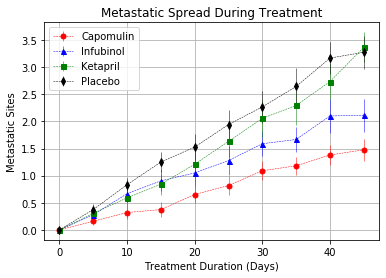

In [31]:
# Generate the Plot with Error Bars

Capomulin_me = plt.errorbar(meta_mean_df_pivot.index, meta_mean_df_pivot["Capomulin"], yerr = meta_err_df_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
Infubinol_me = plt.errorbar(meta_mean_df_pivot.index, meta_mean_df_pivot["Infubinol"], yerr = meta_err_df_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
Ketapril_me = plt.errorbar(meta_mean_df_pivot.index, meta_mean_df_pivot["Ketapril"], yerr = meta_err_df_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
Placebo_me = plt.errorbar(meta_mean_df_pivot.index, meta_mean_df_pivot["Placebo"], yerr = meta_err_df_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.legend(handles = [Capomulin_me, Infubinol_me, Ketapril_me, Placebo_me], labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc = "best")
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid()
fig.savefig('py_meta_spread.png')
plt.show()

### Survival Rates

In [32]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame

mice_count = mouse_trial_data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
mice_count_df = pd.DataFrame(mice_count)
mice_count_df = mice_count_df.reset_index()
mice_count_df = mice_count_df.rename(columns = {"Mouse ID":"Mouse Count"})
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [33]:
# Minor Data Munging to Re-Format the Data Frames

mice_count_pivot = mice_count_df.pivot(index = "Timepoint", columns = "Drug")["Mouse Count"]
mice_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


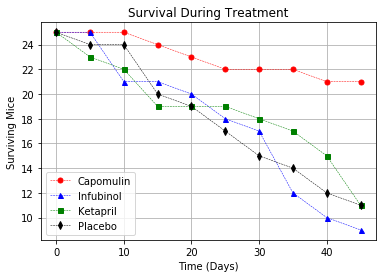

In [34]:
# Generate the Plot for Survival

Capomulin_m = plt.errorbar(mice_count_pivot.index, mice_count_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
Infubinol_m = plt.errorbar(mice_count_pivot.index, mice_count_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
Ketapril_m = plt.errorbar(mice_count_pivot.index, mice_count_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
Placebo_m = plt.errorbar(mice_count_pivot.index, mice_count_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.legend(handles = [Capomulin_m, Infubinol_m, Ketapril_m, Placebo_m], labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc = "best")
plt.title("Survival During Treatment")
plt.ylabel("Surviving Mice")
plt.xlabel("Time (Days)")
plt.grid()
fig.savefig('py_survival.png')
plt.show()

### Summary Bar Graph

In [35]:
# Calculate the percent changes for each drug

percent_change_tumor = (tumor_volume_mean_df_pivot.iloc[-1] - tumor_volume_mean_df_pivot.iloc[0]) / tumor_volume_mean_df_pivot.iloc[0] * 100
percent_change_tumor

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [36]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Use functions to label the percentages of changes
# Call functions to implement the function calls

percent_change_tuple = (percent_change_tumor["Capomulin"], 
    percent_change_tumor["Infubinol"], 
    percent_change_tumor["Ketapril"], 
    percent_change_tumor["Placebo"]) 
percent_change_tuple

(-19.475302667894173, 46.12347172785184, 57.028794686606076, 51.29796048315153)

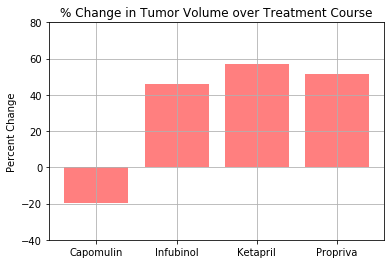

In [37]:
x_axis = np.arange(0, 4, 1)
plt.bar(x_axis, percent_change_tuple, color="r", alpha=0.5)
plt.title("% Change in Tumor Volume over Treatment Course")
plt.ylabel("Percent Change")
plt.ylim(-40,80)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Propriva", "Placebo"])
plt.grid()
fig.savefig('py_percent_change_tumor.png')
plt.show()